# 某知名连锁餐馆的困惑

国内某餐饮连锁有限公司（以下简称T餐饮）成立于1998年，主要经营粤菜，兼顾湘菜、川菜等综合菜系。至今已经发展成为在国内具有一定知名度、美誉度，多品牌、立体化的大型餐饮连锁企业。员工1000多人，拥有16家直营分店，经营总面积近13000平方米，年营业额近亿元。某旗下各分店均坐落在繁华市区主干道，雅致的装潢，配之以精致的饰品、灯具、起舞，出品精美，服务规范。

近年来餐饮行业面临较为复杂的市场环境，与其他行业一样，餐饮企业都遇到了原材料成本升高、人力成本升高、房租成本升高等问题，这也使得整个行业的利润急剧下降。人力成本和房租成本的上升时必然趋势，如何在保持产品质量的同时提高企业效率，成为了T餐饮企业急需解决的问题。从2000年开始，T餐饮企业通过加强信息化管理来提高效率，目前已上线的管理系统如下：

1. 客户关系管理系统
2. 前厅管理系统
3. 后厨管理系统
4. 财务管理系统
5. 物资管理系统

通过以上信息化的建设，T餐饮已经积累了大量的历史数据，有没有一种方法可帮助企业从这些数据中洞察商机，提取价值？在同质化的市场竞争中，怎样找到一些市场以前并不存在的“捡漏”和“补缺”呢？

## 一、数据质量分析
数据质量分析是数据挖掘中数据准备过程的重要一环，是数据预处理的前提，也是数据挖掘分析结论有效性和准确性的基础，没有可信的数据，数据挖掘构建的模型将是空中楼阁。

数据质量分析的主要任务是检查原始数据中是否存在脏数据，脏数据一般是指不符合要求，以及不能直接进行相应分析的数据。在常见的数据挖掘工作中，脏数据包括如下内容。

* 缺失值
* 异常值
* 不一致的值
* 重复数据
* 含有特殊符号的数据


### 餐饮数据的缺失值
如果数据记录和属性较多，使用人工分辨的方法就不切合实际，所以这里需要编写程序来检测出含有缺失值的记录和属性，以及缺失率个数和缺失率等。

In [1]:
import pandas as pd

catering_sale = '../data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


通过对比数据描述（data.describe()）中的count与数据的长度（len(data)），可以知道数据记录为201条，但是有效数据量为200条，因此缺失值数为1。

In [2]:
print('缺失值个数为：%d' % (len(data) - data.count()))

缺失值个数为：1


### 餐饮数据的异常值
数据描述返回的基本数据还有：平均值（mean）、标准差（std）、最小值（min）、最大值（max）以及1/4、1/2、3/4分位数（25%、50%、75%）。使用箱形图，可以检测异常值。

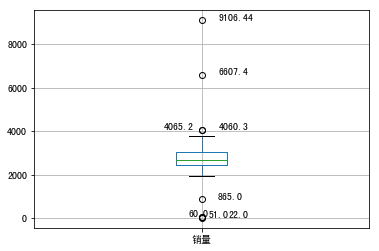

In [3]:
import matplotlib.pyplot as plt #导入图像库

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure() #建立图像
p = data.boxplot(return_type='dict') #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图


从图中可以看出，箱型图中的超过上下界的7个销售额数据可能为异常值。结合具体业务可以把865、4060.3、4065.2归为正常值，将22、51、60、6607.4、9106.44归为异常值。最后确定过滤规则为：日销量在400以下5000以上则属于异常数据，编写过滤程序，进行后续处理。

## 二、数据特征分析

对数据进行质量分析以后，接下来可通过绘制图表、计算某些特征量等手段进行数据的特征分析。

* 分布分析
  * 定量数据的分布分析：年龄的分布分析，0-9岁、10-19岁...
  * 定性数据的分布分析：菜品的分布分析，select count(0) from sales group by dish_name
* 对比分析
  * 绝对数比较
  * 相对数比较
* 统计量分析
  * 集中趋势度量：均值（mean）、中位数、众数
  * 离中趋势度量：极差（max - min）、标准差、变异系数、四分位数间距
* 周期性分析
  * 探索某个变量是否随着时间变化而呈现出某种周期变化趋势
* 贡献度分析
  * 贡献度分析又称帕累托分析，它的原理是帕累托法则，又称20/80定律。同样的投入放在不同的地方会产生不同的效益。
* 相关性分析
  1. 直接绘制散点图：判断两个变量是否具有线性相关关系的最直观的方法是直接绘制散点图。
  2. 绘制散点图矩阵：需要同时考察多个变量间的相关关系时，可利用散点图矩阵，从而快速发现多个变量间的主要相关性，这在进行多元线性回归时显得尤为重要。
  3. 计算相关系数：为了更加准确的描述变量之间的线性相关程度，可以通过计算相关系统来进行分析。
    * Pearson相关系数
    * Spearman相关系数

### 餐饮销量数据统计量分析

1. 首先过滤异常数据
2. 计算极差、变异系数、四分位数间距

In [4]:
cleaned_data = data[(data[u'销量'] > 400) & (data[u'销量'] < 5000)]
statistics = cleaned_data.describe()

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距

statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755


### 餐饮菜品贡献度分析

对餐饮企业来讲，应用贡献度分析可以重点改善某菜系盈利最高的前80%的菜品，或者重点发展综合影响最高的80%的部门。这种结果可以通过帕累托图直观的呈现出来。

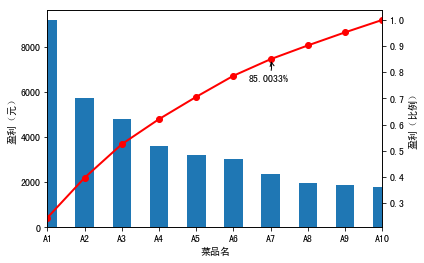

In [5]:
#初始化参数
dish_profit = '../data/catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()
data.sort_values(ascending = False)

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()

上图是海鲜系列的10个菜品A1～A10某个月的盈利额（已按照从大到小排序）。

菜品A1～A7共7个菜品，占菜品种类数的70%，总盈利额占该月盈利额的85.003%。根据帕累托法则，应该增加对菜品A1～A7的成本投入，减少对菜品A8～A10的投入以获得更高的盈利额。

### 餐饮销量相关性分析

餐饮系统中可以统计得到不同菜品的日销量数据，数据示例如下：

In [6]:
catering_sale = '../data/catering_sale_all.xls' #餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

data.head()

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
日期,,,,,,,,,,
2015-01-01,17,6,8,24,13.0,13,18,10,10,27
2015-01-02,11,15,14,13,9.0,10,19,13,14,13
2015-01-03,10,8,12,13,8.0,3,7,11,10,9
2015-01-04,9,6,6,3,10.0,9,9,13,14,13
2015-01-05,4,10,13,8,12.0,10,17,11,13,14


分析这些菜品销售量之间的相关性可以得到不同菜品之间的关系，比如是替补菜品、互补菜品或者没有关系，为原材料采购提供参考。

In [7]:
#只显示“百合酱蒸凤爪”与其他菜式的相关系数
data.corr()[u'百合酱蒸凤爪']

#计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数
# data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺']) 

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

从上面的结果可以看到，如果顾客点了“百合酱蒸凤爪”，则和点“翡翠蒸香茜饺”、“金银蒜汁蒸排骨”、“香煎罗卜糕”、“铁板酸菜豆腐”、“香煎韭菜饺”等主食类的相关性比较低，反而点“乐膳真味鸡”、“生炒菜心”、“原汁原味菜心”的相关性比较高。

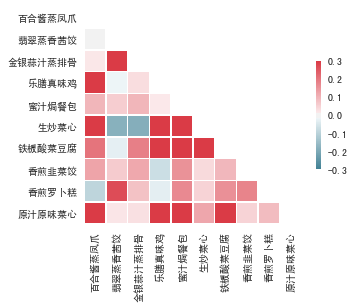

In [8]:
from string import ascii_letters
import numpy as np
import seaborn as sns

#相关系数矩阵，即给出了任意两款菜式之间的相关系数
corr = data.corr()

sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.show()

## 作业

#### 使用Spearsman的方法计算各种菜式之间的相关性？

#### 什么是数据分析？数据分析、数据挖掘与数据探索的区别是什么？

#### 数据分析按目标分为：描述性分析、预测性分析、规范性分析，请回答一下这些分析的区别是什么？

#### 数据分析的3个阶段，6个步骤是什么？

#### 常见的数据质量问题有哪些？

#### 数据质量分析的手段有哪些？

#### 数据探索里面数据特征分析的手段有哪些？

#### 为什么要在数据探索之前进行数据质量分析？

#### 参考资料：
 * 《成为数据分析师：6步练就数据思维》
 * 《Python数据分析与挖掘实战》